| **Section** | **Description** |
|------------|---------------|
| **1.0 [Introduction](#Introduction)** |  |
| **1.1 [Business Problem](#Business-Problem)** |  |
| **2.0 [Project Description & Project Scoping](#Project-Description-&-Project-Scoping)** |  |
| **2.1 [Project Description](#Project-Description)** |  |
| **2.2 [Problem Statement](#Problem-Statement)** |  |
| **2.3 [Possible Impact of Your Analysis](#Possible-Impact-of-Your-Analysis)** |  |
| **2.4 [Project Phases](#Project-Phases)** |  |
| **3.0 [Required Libraries Importing](#Import-required-libraries-&-data)** |  |
| **3.1 [Data Curation](#Data-Curation/-Preprocessing/-Feature-Engineering)** |  |
| **3.2.1 [Data Sourcing](#Data-Sourcing)** |  |
| **3.2.2 [Data Profiling](#Data-Profiling)** |  |
| **3.2.3 [Data Wrangling](#Data-Wrangling)** |  |
| **4.0 [Exploratory Data Analysis](#EDA:-Exploratory-data-analysis)** |  |
| **5.0 [Feature Engineering](#Feature-Engineering)** |  |
| **6.0 [Datafolio & Dashboard](#Datafolio-&-Dashboard)** |  |
| **7.0 [Final Report](#Final-Report)** |  |


# Introduction

### Business Problem
The entertainment industry faces challenges in identifying the key drivers of a movie's financial and critical success. With limited data-driven insights, production companies, streaming platforms, and marketing teams often make decisions based on intuition rather than evidence. Understanding the factors influencing a movie's success—measured by audience ratings, critics' scores, and gross revenue—is critical to improving decision-making.

**Objective**:

Leverage the IMDB Top 1000 Movies dataset to:
* Analyze trends and patterns in movie performance across various genres, directors, and release years.
* Identify correlations between audience ratings, critics' metascores, and gross revenue.
* Provide actionable insights to optimize production, marketing, and content strategies for future movies.


 # Project Description & Project Scoping

### Project Description
**Data of the top 1000 movies scraped from the IMDB website. Dataset also duplicates a movie in another row if the movie consists of more than one genre**


1. Title: Title of Movie
2. Director: Director of the movie
3. Release year: Year that the movie was released in
4. Runtime: Duration of the movie
5. Genre: Genre of the movie
6. Rating: Audience Rating of the movie
7. Metascore: Critics Rating of the movie
8. Gross(M): Total grossing of the movie



### Problem Statement
**Analyze the IMDB movie reviews dataset to uncover insights, patterns, and trends in the data by applying data engineering skills, and Data Cleaning process to improve decision making**


### Possible Impact of Your Analysis
* The analysis can provide insights into how movie trends behave in relation to gross revenue and ratings, offering ideas about the factors that contribute to a movie's financial or critical success.
* Audience Insights: Understanding patterns in audience ratings and critics' scores (Rating and Metascore) can provide insights into the preferences of viewers and critics. This could help production studios and filmmakers align their content with audience expectations.
*  Genre Trends: By analyzing genres and their success in terms of ratings and gross revenue, you can identify popular trends and profitable genres. This information could be used by film producers and distributors to target high-demand markets.


### Project Phases

* Data Curation
* Exploratory Data Analysis
* Datafolio & Dashboard
* Final Report

# Import required libraries & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, math

import warnings
warnings.filterwarnings("ignore")

# Data Curation/ Preprocessing/ Feature Engineering

### Data Sourcing

In [2]:
raw_data = pd.read_csv("/kaggle/input/imdb-top-1000-movies/imdb_raw.csv")
raw_data.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97,$4.36M


In [3]:
print("raw data shape:", raw_data.shape)

raw data shape: (1000, 8)


### Data Profiling

In [4]:
def columns_info(df):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    shape = []

    for colm in df.columns:
        colms.append(colm)
        dtypes.append(df[colm].dtypes)
        unique.append(df[colm].unique())
        nunique.append(df[colm].nunique())
        nulls.append(df[colm].isna().sum())
        shape.append(df[colm].shape)



    return pd.DataFrame({'Columns': colms,
                         'Data Types': dtypes,
                         'Unique values': unique,
                         'Number of unique': nunique,
                         'missing values': nulls,
                         "Shape":shape})

columns_info(raw_data)

,Columns,Data Types,Unique values,Number of unique,missing values,Shape
0,title,object,"[The Shawshank Redemption, The Godfather, The ...",994,0,"(1000,)"
1,director,object,"[Frank Darabont, Francis Ford Coppola, Christo...",560,0,"(1000,)"
2,release_year,object,"[(1994), (1972), (2008), (1993), (1957), (2003...",123,0,"(1000,)"
3,runtime,object,"[142 min, 175 min, 152 min, 195 min, 96 min, 2...",142,0,"(1000,)"
4,genre,object,"[Drama, Crime, Drama, Action, Crime, Drama, Bi...",195,0,"(1000,)"
5,rating,float64,"[9.3, 9.2, 9.0, 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, ...",17,0,"(1000,)"
6,metascore,int64,"[82, 100, 84, 95, 97, 94, 90, 86, 74, 92, 67, ...",61,0,"(1000,)"
7,gross,object,"[$28.34M, $134.97M, $534.86M, $96.90M, $4.36M,...",709,0,"(1000,)"



**for now, we are going to use the raw data in order to apply data curation techniques**

We have inconsistent data types of some features, so we need to change its their dtypes:
<ol>
    <li>Release date: int64</li>
    <li>Runtime: int64</li>
    <li>Gross: float64</li>
</ol>

there also no missing in the data so its wonderfull.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   director      1000 non-null   object 
 2   release_year  1000 non-null   object 
 3   runtime       1000 non-null   object 
 4   genre         1000 non-null   object 
 5   rating        1000 non-null   float64
 6   metascore     1000 non-null   int64  
 7   gross         1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
raw_data.describe()

,rating,metascore
count,1000.00000,1000.000000
mean,7.96870,66.653000
std,0.27562,30.712829
min,7.60000,0.000000
25%,7.80000,64.750000
50%,7.90000,77.000000
75%,8.10000,86.000000
max,9.30000,100.000000


 no duplicates in the data

In [7]:
raw_data.duplicated().sum()

0

### Data Wrangling

**its a good practice to make a checkpoint at certain point to make sure that the real data is not effected by any way**

In [8]:
# Data checkpoint
curated_data = raw_data.copy()

In [9]:
curated_data["release_year"] = raw_data["release_year"].apply(lambda x: int(re.sub(r'\D', '', str(x)))).astype(np.int64)
curated_data["runtime"] = raw_data["runtime"].apply(lambda x: int(re.sub(r'\D', '', str(x)))).astype(np.int64)
curated_data["gross"] = raw_data["gross"].apply(lambda x: int(re.sub(r'\D', '', str(x)))).astype(np.float64)

In [10]:
curated_data.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,2834.0
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,13497.0
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,53486.0
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,9690.0
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,436.0


In [11]:
curated_data.describe()

,release_year,runtime,rating,metascore,gross
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1991.619000,124.136000,7.96870,66.653000,5775.870000
std,24.146861,28.690253,0.27562,30.712829,10917.302962
min,1920.000000,45.000000,7.60000,0.000000,0.000000
25%,1975.000000,103.000000,7.80000,64.750000,23.000000
50%,1999.000000,120.000000,7.90000,77.000000,940.000000
75%,2011.000000,138.000000,8.10000,86.000000,6016.750000
max,2023.000000,321.000000,9.30000,100.000000,93666.000000


**Now, after changing the dtypes of the data, we see that we have some outliers in the data, here we are going the fix them using 
the outlier function the I have made.**

**but what is the outlier?**
outlier are extreme values that differ from most other data points in a dataset. They can have a big impact on your statistical analyses and skew the results of any hypothesis tests

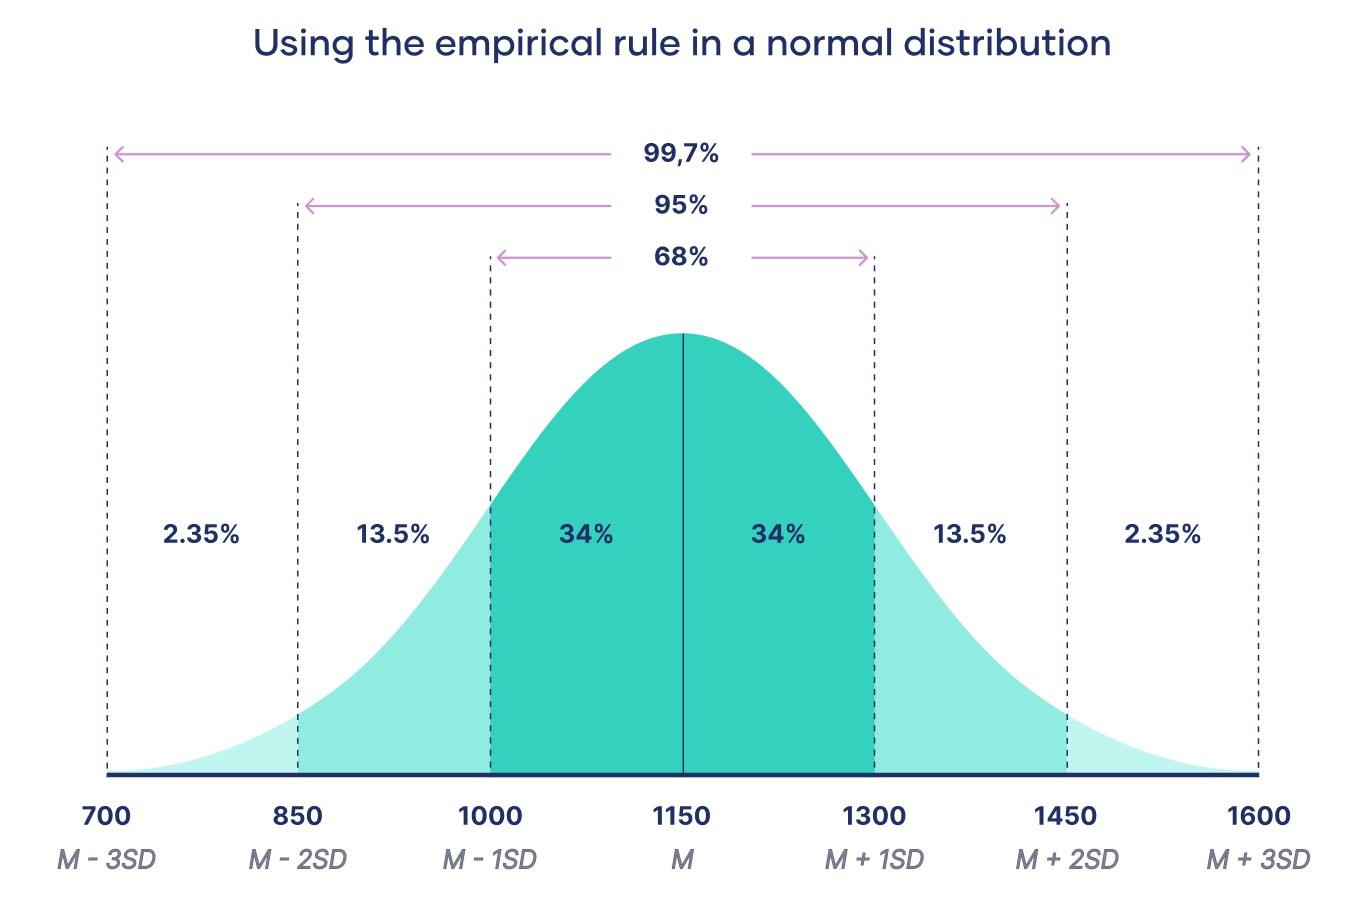
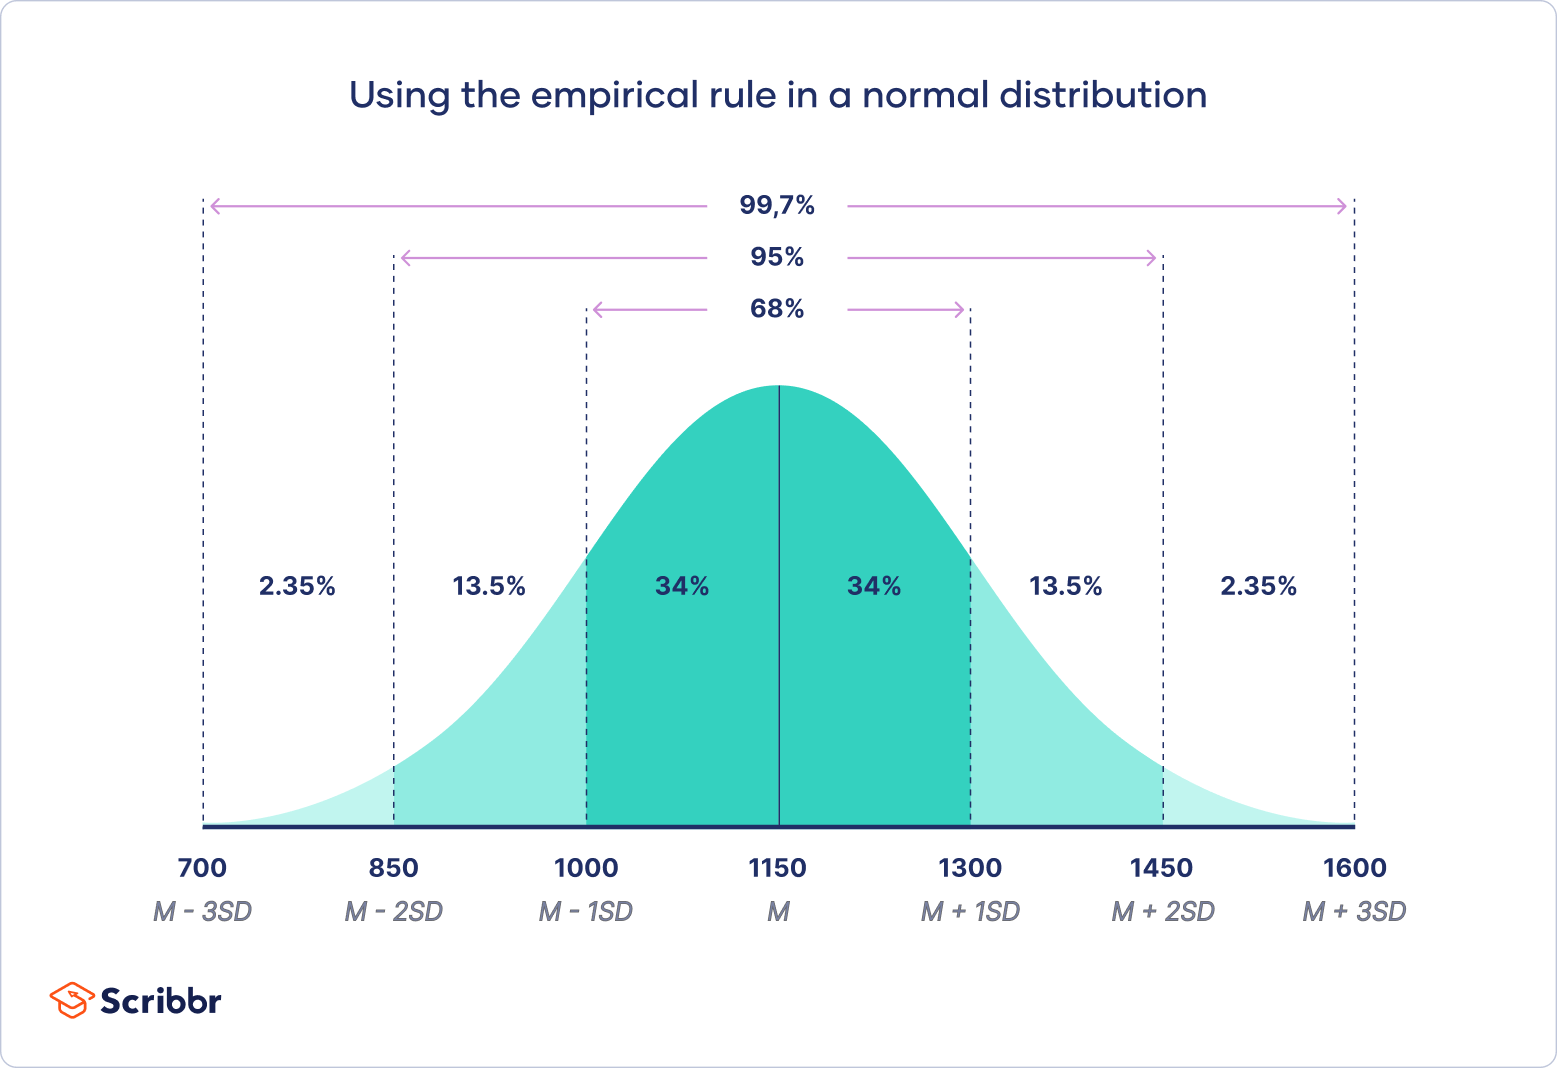
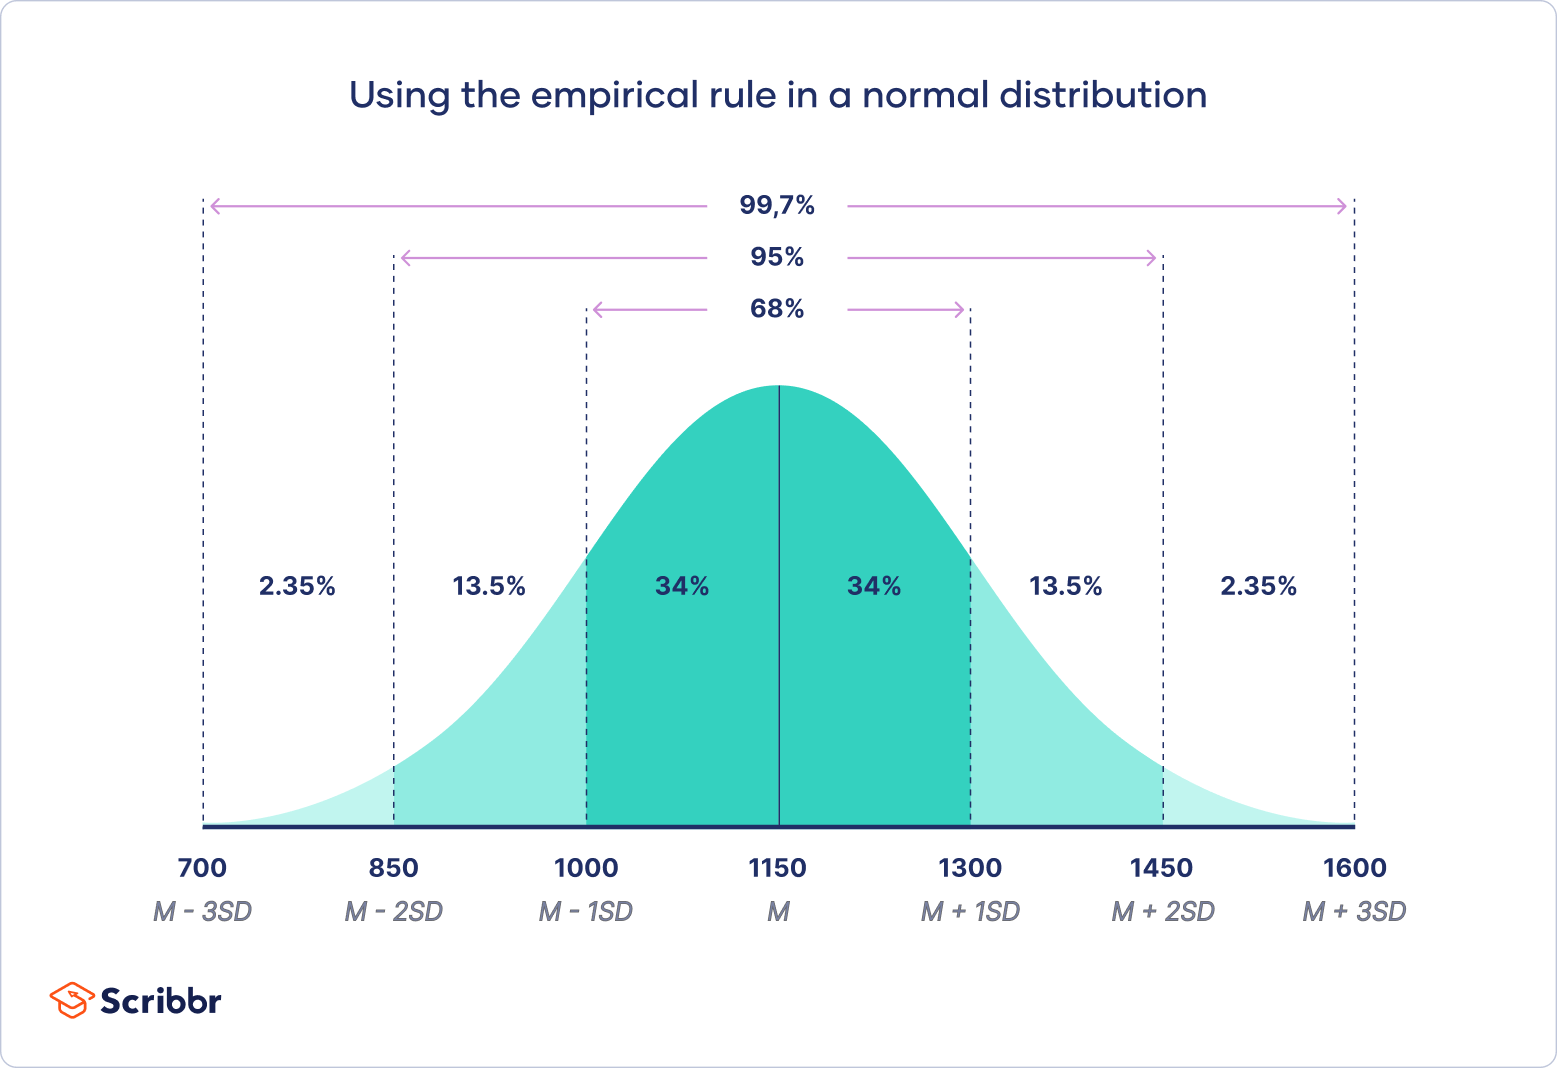
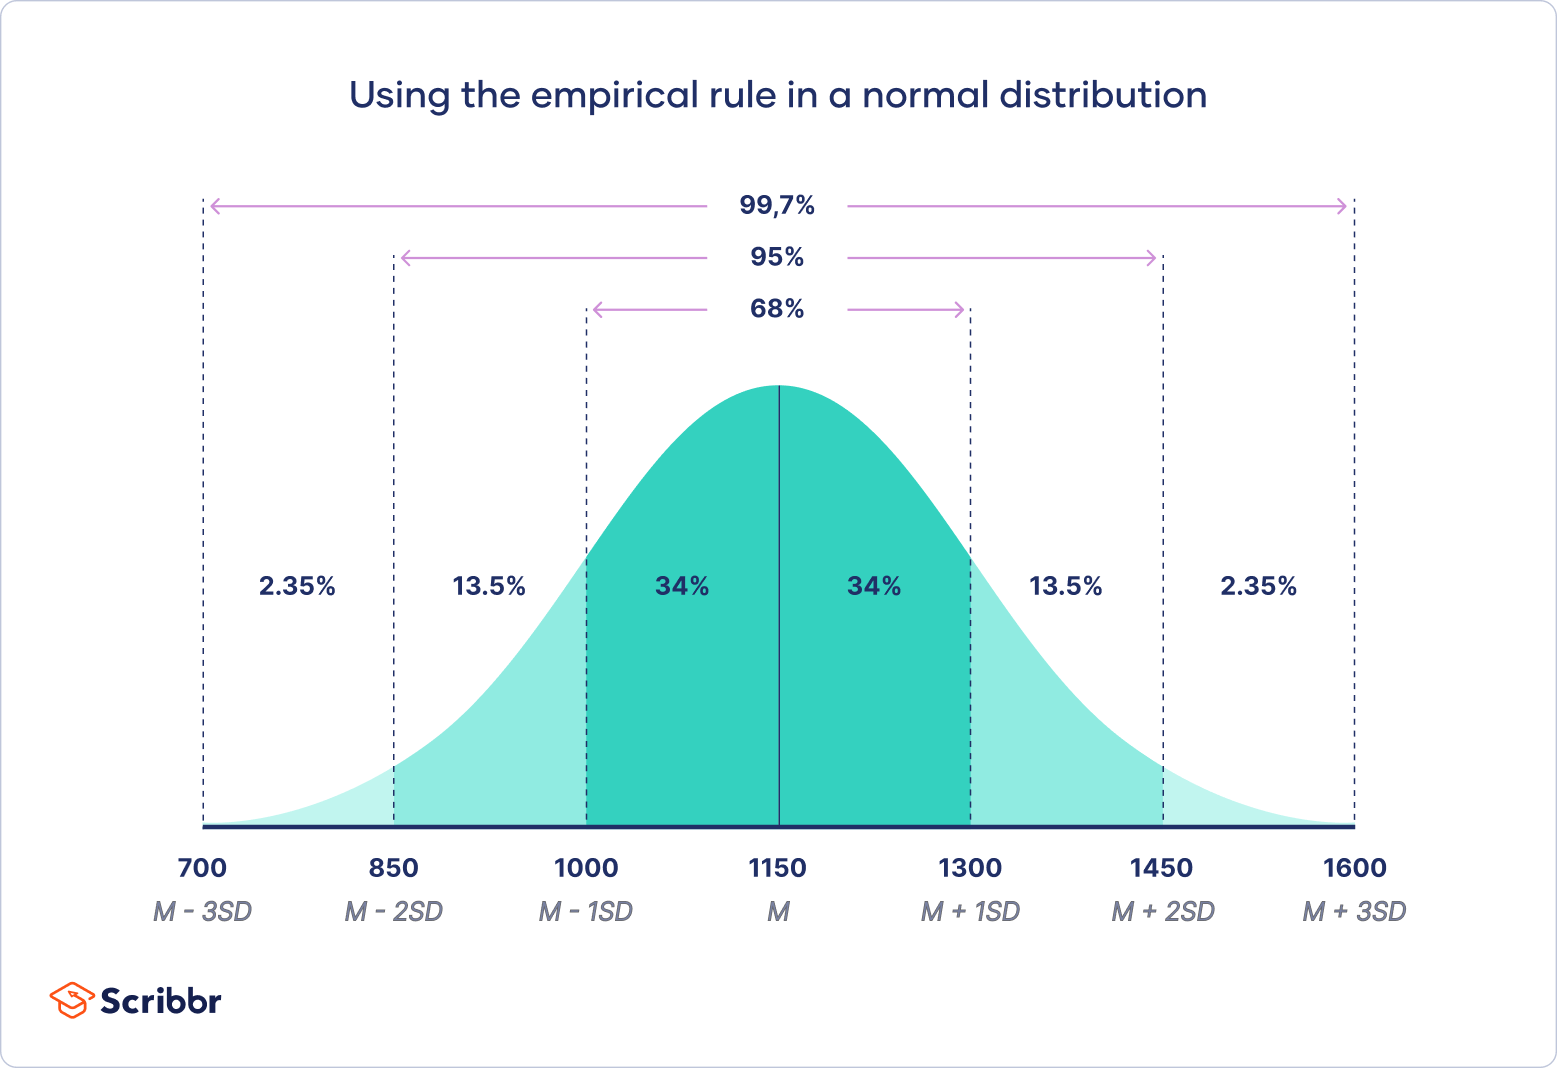

In [19]:
num_col = ['runtime', 'rating', 'metascore', 'gross']

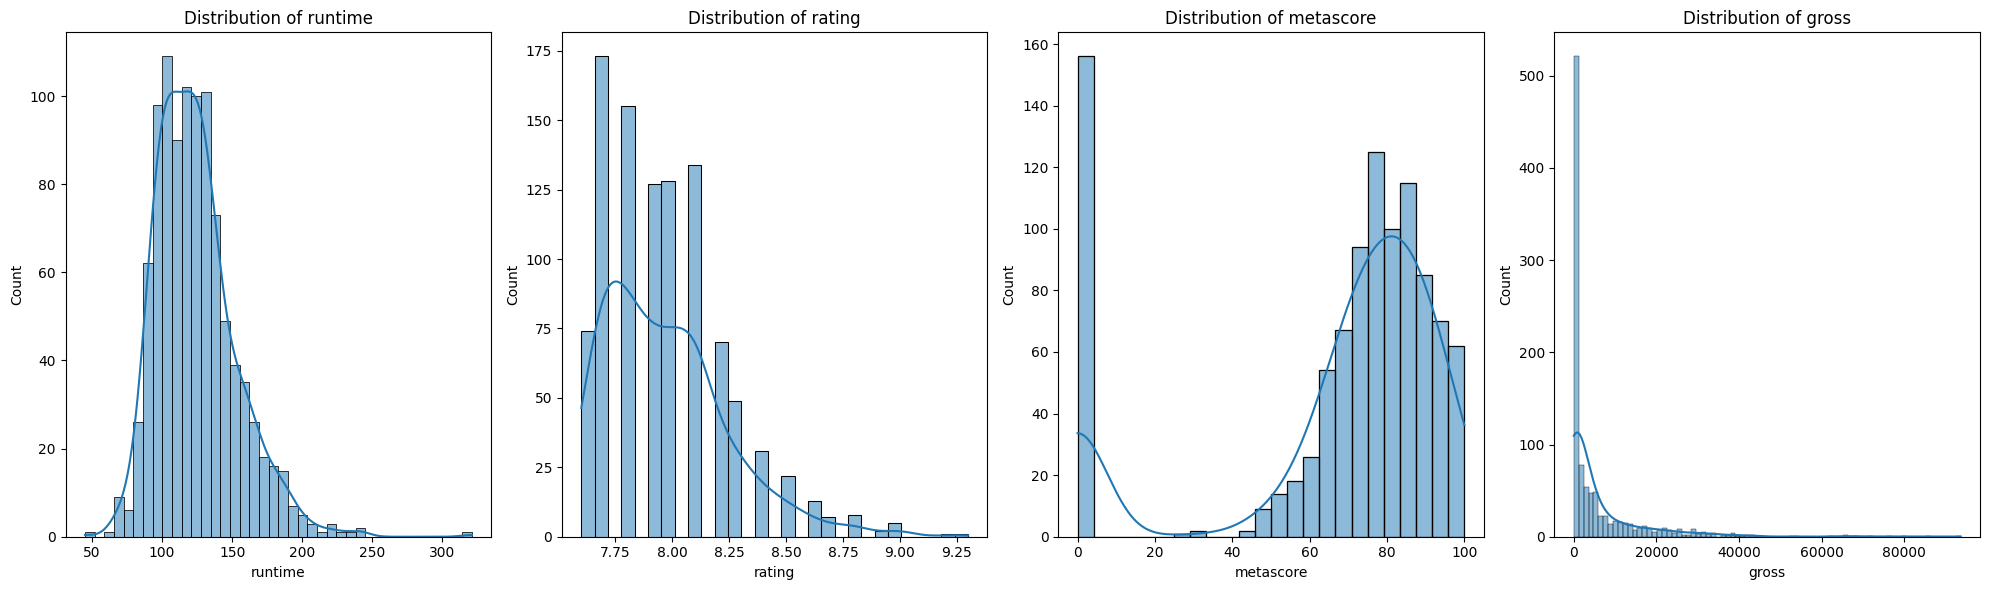

In [20]:
def histplot(data, num_col):
    num_plots = len(num_col)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 6))  
    axes = axes.flatten()
    
    plot_idx = 0
    for col in num_col:
        sns.histplot(data=data, x=col, kde=True, ax=axes[plot_idx])  
        axes[plot_idx].set_title(f"Distribution of {col}")
        
        plot_idx += 1
    
    plt.tight_layout() 
    plt.show()

histplot(curated_data, num_col)


**I have chosen to keep the as same without any handling.
in future(Feature enigneering part, am going to normalize the data, so its will be normally),
however the data seems to be real so I cant change anything or handle outliers so normalization will best solution to be taken.**


As we can see, there some **Gross** with zero value, but this kinda rare situation, so we are ignoring the value of zero

Gross means the total amount of money a film earns from box office sales (tickets sold) before deducting expenses such as production costs, marketing, distribution fees, or exhibitor shares.

So, thats mean we are not going to make any cleaning more , we will jump into a **[Feature Engineering Part](#Feature-Engineering)**


In [21]:
curated_data.describe()

,release_year,runtime,rating,metascore,gross
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1991.619000,124.136000,7.96870,66.653000,5775.870000
std,24.146861,28.690253,0.27562,30.712829,10917.302962
min,1920.000000,45.000000,7.60000,0.000000,0.000000
25%,1975.000000,103.000000,7.80000,64.750000,23.000000
50%,1999.000000,120.000000,7.90000,77.000000,940.000000
75%,2011.000000,138.000000,8.10000,86.000000,6016.750000
max,2023.000000,321.000000,9.30000,100.000000,93666.000000


To conclude our  **[Data Curation phase](#Data-Curation/-Preprocessing/-Feature-Engineering)** this is what we got:
<ol>
    <li>No missing values</li>
    <li>I have changed some data types of certain features</li>
    <li>I have checked the outliers and handled it</li>
</ol>

# EDA: Exploratory data analysis

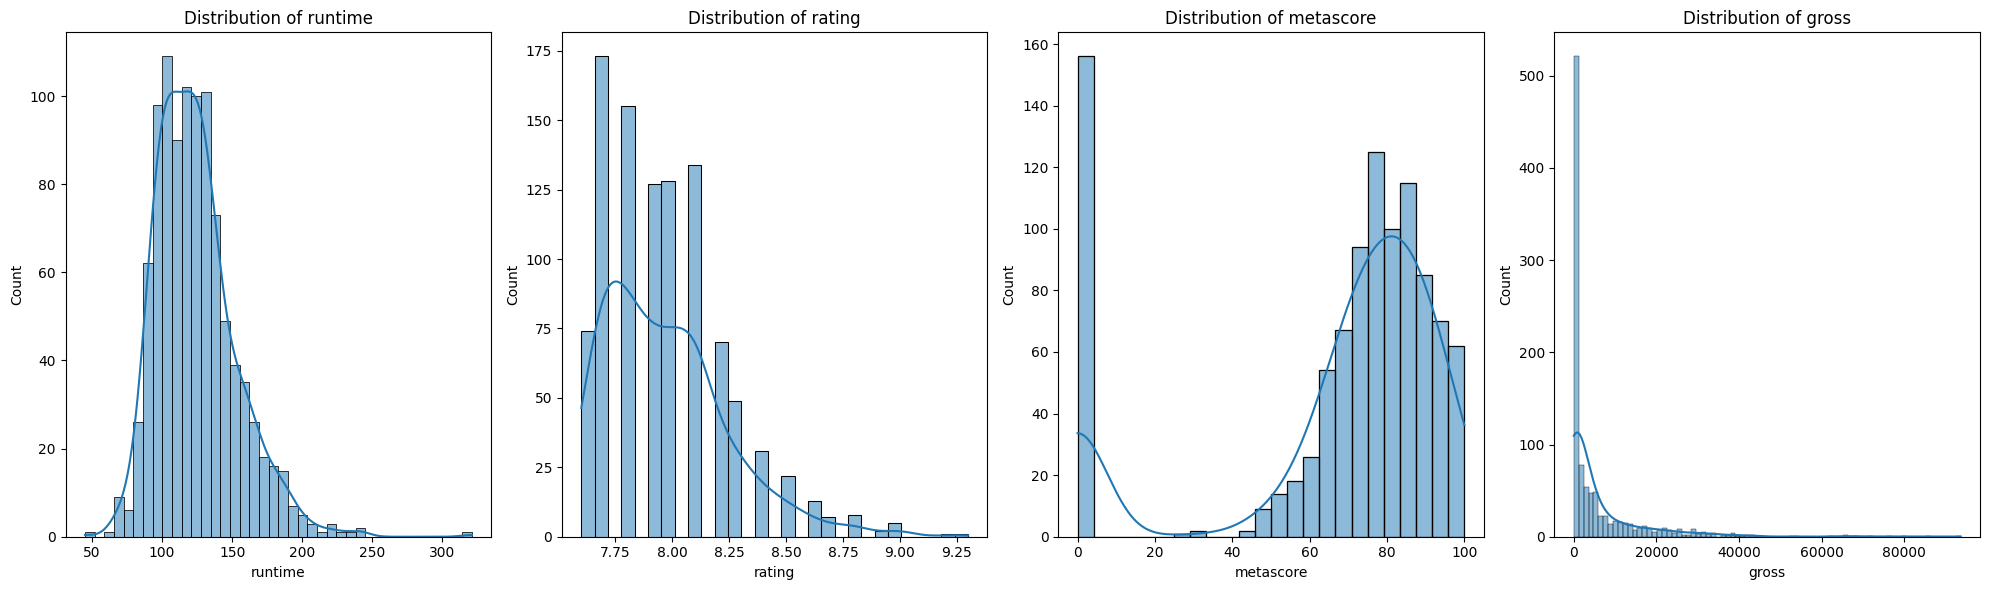

In [22]:
histplot(curated_data, num_col)

In [23]:
curated_data.describe()

,release_year,runtime,rating,metascore,gross
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1991.619000,124.136000,7.96870,66.653000,5775.870000
std,24.146861,28.690253,0.27562,30.712829,10917.302962
min,1920.000000,45.000000,7.60000,0.000000,0.000000
25%,1975.000000,103.000000,7.80000,64.750000,23.000000
50%,1999.000000,120.000000,7.90000,77.000000,940.000000
75%,2011.000000,138.000000,8.10000,86.000000,6016.750000
max,2023.000000,321.000000,9.30000,100.000000,93666.000000


In [24]:
numeric_data = curated_data.select_dtypes(np.number)

print("Mean: \n", numeric_data.mean())
print("Median: \n", numeric_data.median())
print("Mode: \n", numeric_data.mode().iloc[0])  # Taking the first mode if there are multiple
print("Max: \n", numeric_data.max())
print("Min: \n", numeric_data.min())
print("Sum: \n", numeric_data.sum())
print("Standard Deviation: \n",numeric_data.std())

Mean: 
 release_year    1991.6190
runtime          124.1360
rating             7.9687
metascore         66.6530
gross           5775.8700
dtype: float64
Median: 
 release_year    1999.0
runtime          120.0
rating             7.9
metascore         77.0
gross            940.0
dtype: float64
Mode: 
 release_year    2004.0
runtime          130.0
rating             7.7
metascore          0.0
gross              0.0
Name: 0, dtype: float64
Max: 
 release_year     2023.0
runtime           321.0
rating              9.3
metascore         100.0
gross           93666.0
dtype: float64
Min: 
 release_year    1920.0
runtime           45.0
rating             7.6
metascore          0.0
gross              0.0
dtype: float64
Sum: 
 release_year    1991619.0
runtime          124136.0
rating             7968.7
metascore         66653.0
gross           5775870.0
dtype: float64
Standard Deviation: 
 release_year       24.146861
runtime            28.690253
rating              0.275620
metascore          3

In [25]:
curated_data["genre"].nunique()

195

In [26]:
pivot_table = pd.pivot_table(
    curated_data,
    index='genre',            # Rows (main category)
    columns='release_year',   # Columns (subcategory)
    values='gross',           # Values to aggregate (count the number of titles)
    aggfunc='count',          # Use 'count' to calculate subgroup sizes
    fill_value=0              # Fill missing values with 0
)

In [27]:
pivot_table

release_year,1920,1921,1922,1924,1925,1926,1927,1928,1930,1931,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
genre,,,,,,,,,,,,,,,,,,,,,
"Action, Adventure",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action, Adventure, Biography",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"Action, Adventure, Comedy",0,0,0,0,0,1,0,0,0,0,...,2,1,0,2,1,0,0,0,1,1
"Action, Adventure, Crime",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"Action, Adventure, Drama",0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Mystery, Romance, Thriller",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Mystery, Sci-Fi, Thriller",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Mystery, Thriller",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


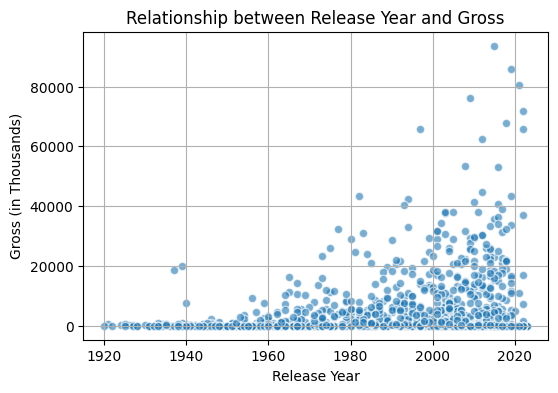

In [28]:
plt.figure(figsize=(6, 4))  
plt.scatter(curated_data["release_year"], curated_data['gross'], alpha=0.6, edgecolors='w') 
plt.xlabel("Release Year")  
plt.ylabel('Gross (in Thousands)') 
plt.title(f'Relationship between Release Year and Gross')  # Title
plt.grid(True)  
plt.show()  

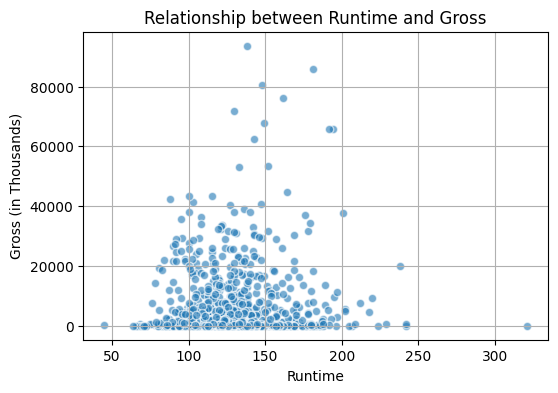

In [29]:
plt.figure(figsize=(6, 4))  
plt.scatter(curated_data["runtime"], curated_data['gross'], alpha=0.6, edgecolors='w') 
plt.xlabel("Runtime")  
plt.ylabel('Gross (in Thousands)') 
plt.title(f'Relationship between Runtime and Gross')  # Title
plt.grid(True)  
plt.show()  

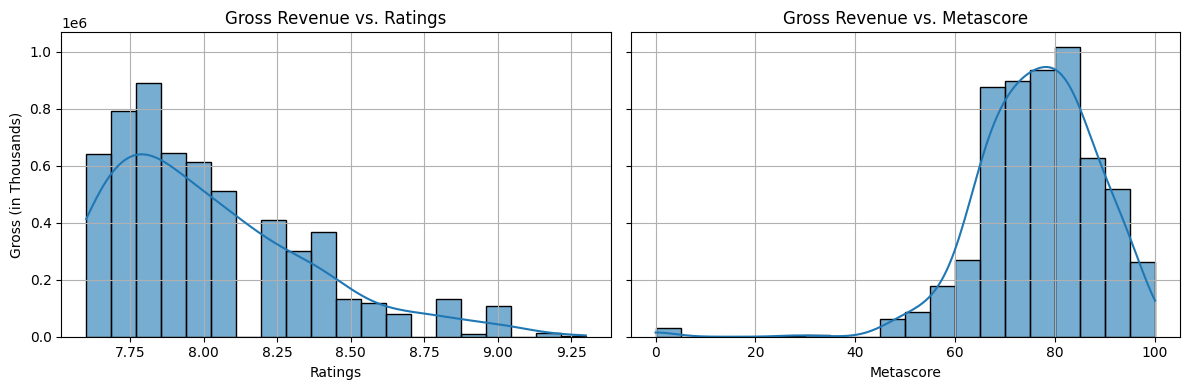

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.histplot(data=curated_data, x="rating", weights="gross", bins=20, alpha=0.6, kde=True, ax=axes[0])
axes[0].set_xlabel("Ratings")
axes[0].set_ylabel("Gross (in Thousands)")
axes[0].set_title("Gross Revenue vs. Ratings")
axes[0].grid(True)

sns.histplot(data=curated_data, x="metascore", weights="gross", bins=20, alpha=0.6, kde=True, ax=axes[1])
axes[1].set_xlabel("Metascore")
axes[1].set_ylabel("")  # No y-label to avoid redundancy
axes[1].set_title("Gross Revenue vs. Metascore")
axes[1].grid(True)

plt.tight_layout()
plt.show()


<Axes: >

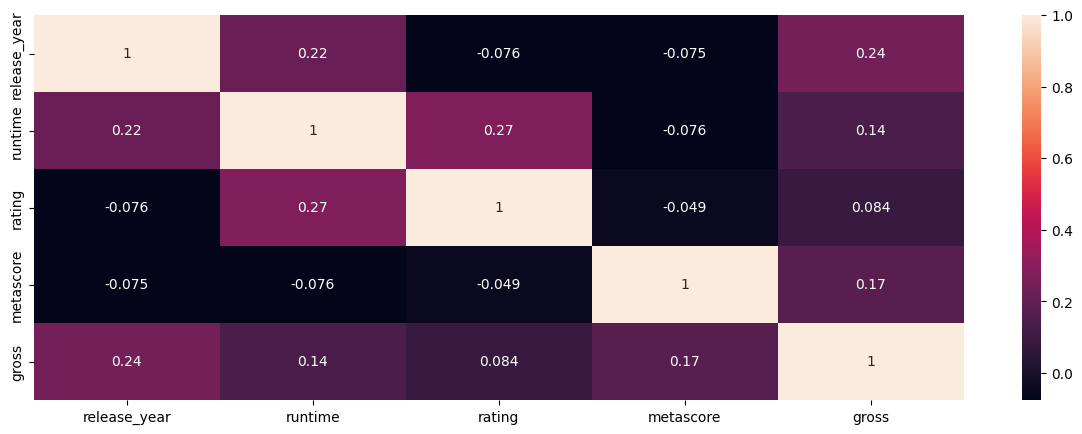

In [31]:
numeric_columns = curated_data.select_dtypes(include=np.number).columns


plt.figure(figsize=(15,5))
sns.heatmap(curated_data[numeric_columns].corr(), annot=True)

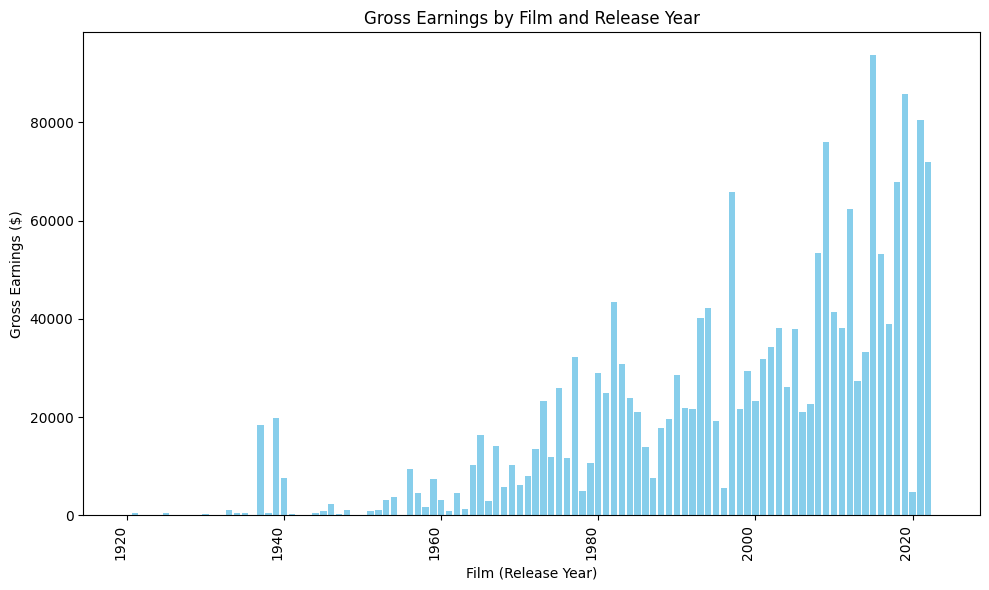

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(curated_data["release_year"], curated_data['gross'], color='skyblue')

plt.title('Gross Earnings by Film and Release Year')
plt.xlabel('Film (Release Year)')
plt.ylabel('Gross Earnings ($)')
plt.xticks(rotation=90, ha='right')  


plt.tight_layout()
plt.show()

In [33]:
curated_data[(curated_data["release_year"]> 1940) & (curated_data["release_year"] < 1960)]

,title,director,release_year,runtime,genre,rating,metascore,gross
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,436.0
33,Seven Samurai,Akira Kurosawa,1954,207,"Action, Drama",8.6,98,27.0
34,It's a Wonderful Life,Frank Capra,1946,130,"Drama, Family, Fantasy",8.6,89,0.0
47,Casablanca,Michael Curtiz,1942,102,"Drama, Romance, War",8.5,100,102.0
54,Rear Window,Alfred Hitchcock,1954,112,"Mystery, Thriller",8.5,100,3676.0
...,...,...,...,...,...,...,...,...
903,The Caine Mutiny,Edward Dmytryk,1954,124,"Drama, War",7.7,63,2175.0
906,Key Largo,John Huston,1948,100,"Action, Crime, Drama",7.7,0,0.0
982,Sabrina,Billy Wilder,1954,113,"Comedy, Drama, Romance",7.6,72,0.0
984,Rebel Without a Cause,Nicholas Ray,1955,111,Drama,7.6,89,0.0


In [34]:
curated_data.shape

(1000, 8)

In [35]:
curated_data.to_csv("Cleaned_Data.csv", index=False)

In [36]:
allGenres = set()


for genre_list in curated_data["genre"]:
    genres = genre_list.split(", ")
    allGenres.update(genres)

num_genres = len(allGenres)
print(f"Total unique genres: {num_genres}")
print("List of genres:", allGenres)

Total unique genres: 21
List of genres: {'War', 'Music', 'Biography', 'History', 'Animation', 'Sci-Fi', 'Musical', 'Romance', 'Western', 'Sport', 'Mystery', 'Comedy', 'Adventure', 'Film-Noir', 'Action', 'Horror', 'Fantasy', 'Family', 'Thriller', 'Crime', 'Drama'}


# Feature Engineering

In feature engineering part, we will use some transforming on feautre to be suitable for modelling, but as the Task said, just some analysis.

In [37]:
from sklearn.model_selection import train_test_split # splitting the data into two parts
from sklearn.metrics import classification_report, confusion_matrix  # evealuation metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from gensim.models import Word2Vec # word embeddings to transform the textual data

In [38]:
num_col

['runtime', 'rating', 'metascore', 'gross']

for numerical data, We will do specific transformation for each one: 
<ol>
    <li>release year: Min Max scaling</li>
    <li>runtime, Gross: Standered Scaler</li>
    <li>metascore, rating: Categorization</li>
    <li>title, director: Vectorization</li>
</ol>

### Categorization

In [39]:
movie_conditions = [
    (curated_data["metascore"] >= 81) & (curated_data["metascore"] <= 100),  # Universal acclaim (Green)
    (curated_data["metascore"] >= 61) & (curated_data["metascore"] <= 80),  # Generally favorable reviews (Green)
    (curated_data["metascore"] >= 40) & (curated_data["metascore"] <= 60),  # Mixed or average reviews (Yellow)
    (curated_data["metascore"] >= 0) & (curated_data["metascore"] <= 39)   # Generally unfavorable reviews (Red)
]
movie_categories = [
    "4",
    "3",
    "2",
    "1"
]

curated_data["metascore_categorized"] = np.select(movie_conditions, movie_categories)

In [40]:
rating_conditions = [
    (curated_data["rating"] >= 8.1) & (curated_data["rating"] <= 10), 
    (curated_data["rating"] >= 6.1) & (curated_data["rating"] <= 8),  
    (curated_data["rating"] >= 4.1) & (curated_data["rating"] <= 6),   
    (curated_data["rating"] >= 0) & (curated_data["rating"] <= 4),
]

rating_categories = [
    "4",  
    "3",  
    "2",  
    "1", 
]
curated_data["rating_categorized"] = np.select(rating_conditions, rating_categories)

### Normalization

Normalization is used to reduce the different scales between feauters which increase the accuracy and data consistency which apply a 0~1 scale on the data

In [41]:
mms = MinMaxScaler()
sc = StandardScaler()

#### MinMaxScaler

I choosed to normalize the data rather than mapping it since the most of the features is normalized, however, there alot of unique values in the release_year feature, otherwise I will be mapping into scale on 1~len(release_year)-1

In [42]:
curated_data["release_year_scaled"] = mms.fit_transform(curated_data["release_year"].values.reshape(-1, 1))

In [43]:
curated_data["runtime_scaled"] = mms.fit_transform(curated_data["runtime"].values.reshape(-1, 1))
curated_data["gross_scaled"] = sc.fit_transform(curated_data["gross"].values.reshape(-1, 1))

In [44]:
curated_data

,title,director,release_year,runtime,genre,rating,metascore,gross,metascore_categorized,rating_categorized,release_year_scaled,runtime_scaled,gross_scaled
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,2834.0,4,4,0.718447,0.351449,-0.269603
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,13497.0,4,4,0.504854,0.471014,0.707592
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,53486.0,4,4,0.854369,0.387681,4.372326
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,9690.0,4,4,0.708738,0.543478,0.358705
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,436.0,4,4,0.359223,0.184783,-0.489365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,Jean-Pierre Jeunet,2004,133,"Drama, Mystery, Romance",7.6,76,617.0,3,3,0.815534,0.318841,-0.472777
996,Shine,Scott Hicks,1996,105,"Biography, Drama, Music",7.6,87,3581.0,4,3,0.737864,0.217391,-0.201146
997,Philomena,Stephen Frears,2013,98,"Biography, Comedy, Drama",7.6,77,3771.0,3,3,0.902913,0.192029,-0.183733
998,The Invisible Man,James Whale,1933,71,"Horror, Sci-Fi",7.6,87,0.0,4,3,0.126214,0.094203,-0.529321


#### Vectorization the textual data

In [54]:
curated_data["Movie_Author_genre"] = curated_data["title"] + ": " + curated_data["director"] + ", " + curated_data["genre"]

In [55]:
curated_data

,title,director,release_year,runtime,genre,rating,metascore,gross,metascore_categorized,rating_categorized,release_year_scaled,runtime_scaled,gross_scaled,Movie_Author_genre
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,2834.0,4,4,0.718447,0.351449,-0.269603,"The Shawshank Redemption: Frank Darabont, Drama"
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,13497.0,4,4,0.504854,0.471014,0.707592,"The Godfather: Francis Ford Coppola, Crime, Drama"
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,53486.0,4,4,0.854369,0.387681,4.372326,"The Dark Knight: Christopher Nolan, Action, Cr..."
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,9690.0,4,4,0.708738,0.543478,0.358705,"Schindler's List: Steven Spielberg, Biography,..."
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,436.0,4,4,0.359223,0.184783,-0.489365,"12 Angry Men: Sidney Lumet, Crime, Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,Jean-Pierre Jeunet,2004,133,"Drama, Mystery, Romance",7.6,76,617.0,3,3,0.815534,0.318841,-0.472777,"A Very Long Engagement: Jean-Pierre Jeunet, Dr..."
996,Shine,Scott Hicks,1996,105,"Biography, Drama, Music",7.6,87,3581.0,4,3,0.737864,0.217391,-0.201146,"Shine: Scott Hicks, Biography, Drama, Music"
997,Philomena,Stephen Frears,2013,98,"Biography, Comedy, Drama",7.6,77,3771.0,3,3,0.902913,0.192029,-0.183733,"Philomena: Stephen Frears, Biography, Comedy, ..."
998,The Invisible Man,James Whale,1933,71,"Horror, Sci-Fi",7.6,87,0.0,4,3,0.126214,0.094203,-0.529321,"The Invisible Man: James Whale, Horror, Sci-Fi"


In [56]:
prepared = curated_data.copy()

In [57]:
word2vec1 = Word2Vec(
    window=5, # means 5 words before the target word and 5 after it
    min_count = 1,
    workers=8,
    sg = 0,
    sentences = prepared["Movie_Author_genre"] # here if we provide the text, there is no mean of building and training the model again
)

In [58]:
print(f"Vocabulary Size: {len(word2vec1.wv.key_to_index)}")

Vocabulary Size: 89


In [59]:
def get_mean_vector(text):
    if text:
        return word2vec1.wv.get_mean_vector(text)
prepared["Movie_Author_genre_vector"] = [get_mean_vector(text) for text in prepared["Movie_Author_genre"]]


In [60]:
prepared

,title,director,release_year,runtime,genre,rating,metascore,gross,metascore_categorized,rating_categorized,release_year_scaled,runtime_scaled,gross_scaled,Movie_Author_genre,Movie_Author_genre_vector
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,2834.0,4,4,0.718447,0.351449,-0.269603,"The Shawshank Redemption: Frank Darabont, Drama","[-0.046380382, 0.06633545, 0.0041488106, 0.087..."
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,13497.0,4,4,0.504854,0.471014,0.707592,"The Godfather: Francis Ford Coppola, Crime, Drama","[-0.047153674, 0.066849455, 0.00466023, 0.0879..."
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,53486.0,4,4,0.854369,0.387681,4.372326,"The Dark Knight: Christopher Nolan, Action, Cr...","[-0.044970293, 0.06797095, 0.004485809, 0.0869..."
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,9690.0,4,4,0.708738,0.543478,0.358705,"Schindler's List: Steven Spielberg, Biography,...","[-0.040955175, 0.07177328, 0.0023020867, 0.078..."
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,436.0,4,4,0.359223,0.184783,-0.489365,"12 Angry Men: Sidney Lumet, Crime, Drama","[-0.046095677, 0.06608196, 0.004742327, 0.0901..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,Jean-Pierre Jeunet,2004,133,"Drama, Mystery, Romance",7.6,76,617.0,3,3,0.815534,0.318841,-0.472777,"A Very Long Engagement: Jean-Pierre Jeunet, Dr...","[-0.04347301, 0.068739116, 0.0033309541, 0.085..."
996,Shine,Scott Hicks,1996,105,"Biography, Drama, Music",7.6,87,3581.0,4,3,0.737864,0.217391,-0.201146,"Shine: Scott Hicks, Biography, Drama, Music","[-0.04381001, 0.068185054, 0.0038936601, 0.082..."
997,Philomena,Stephen Frears,2013,98,"Biography, Comedy, Drama",7.6,77,3771.0,3,3,0.902913,0.192029,-0.183733,"Philomena: Stephen Frears, Biography, Comedy, ...","[-0.048150185, 0.06494203, 0.004851516, 0.0895..."
998,The Invisible Man,James Whale,1933,71,"Horror, Sci-Fi",7.6,87,0.0,4,3,0.126214,0.094203,-0.529321,"The Invisible Man: James Whale, Horror, Sci-Fi","[-0.03940927, 0.07149673, 0.0014013806, 0.0762..."


In [61]:
col = ["metascore_categorized",
       "rating_categorized",
       "release_year_scaled",
       "runtime_scaled", 
       "gross_scaled",
       "Movie_Author_genre_vector"]

In [62]:
data = prepared[col]

In [63]:
data

,metascore_categorized,rating_categorized,release_year_scaled,runtime_scaled,gross_scaled,Movie_Author_genre_vector
0,4,4,0.718447,0.351449,-0.269603,"[-0.046380382, 0.06633545, 0.0041488106, 0.087..."
1,4,4,0.504854,0.471014,0.707592,"[-0.047153674, 0.066849455, 0.00466023, 0.0879..."
2,4,4,0.854369,0.387681,4.372326,"[-0.044970293, 0.06797095, 0.004485809, 0.0869..."
3,4,4,0.708738,0.543478,0.358705,"[-0.040955175, 0.07177328, 0.0023020867, 0.078..."
4,4,4,0.359223,0.184783,-0.489365,"[-0.046095677, 0.06608196, 0.004742327, 0.0901..."
...,...,...,...,...,...,...
995,3,3,0.815534,0.318841,-0.472777,"[-0.04347301, 0.068739116, 0.0033309541, 0.085..."
996,4,3,0.737864,0.217391,-0.201146,"[-0.04381001, 0.068185054, 0.0038936601, 0.082..."
997,3,3,0.902913,0.192029,-0.183733,"[-0.048150185, 0.06494203, 0.004851516, 0.0895..."
998,4,3,0.126214,0.094203,-0.529321,"[-0.03940927, 0.07149673, 0.0014013806, 0.0762..."


In [64]:
column_names = ["metascore", "rating", "release_year", "runtime", "gross", "Movie_Author_genre"]

data.columns = column_names

In [65]:
data

,metascore,rating,release_year,runtime,gross,Movie_Author_genre
0,4,4,0.718447,0.351449,-0.269603,"[-0.046380382, 0.06633545, 0.0041488106, 0.087..."
1,4,4,0.504854,0.471014,0.707592,"[-0.047153674, 0.066849455, 0.00466023, 0.0879..."
2,4,4,0.854369,0.387681,4.372326,"[-0.044970293, 0.06797095, 0.004485809, 0.0869..."
3,4,4,0.708738,0.543478,0.358705,"[-0.040955175, 0.07177328, 0.0023020867, 0.078..."
4,4,4,0.359223,0.184783,-0.489365,"[-0.046095677, 0.06608196, 0.004742327, 0.0901..."
...,...,...,...,...,...,...
995,3,3,0.815534,0.318841,-0.472777,"[-0.04347301, 0.068739116, 0.0033309541, 0.085..."
996,4,3,0.737864,0.217391,-0.201146,"[-0.04381001, 0.068185054, 0.0038936601, 0.082..."
997,3,3,0.902913,0.192029,-0.183733,"[-0.048150185, 0.06494203, 0.004851516, 0.0895..."
998,4,3,0.126214,0.094203,-0.529321,"[-0.03940927, 0.07149673, 0.0014013806, 0.0762..."
